# Title: Reading and ploting well trajectories

## Import Libraries

In [38]:
import welly
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px

## Useful Functions

## Import Data

In [3]:
WITSML_file = r"M:\Volve\WITSML Realtime drilling data\Norway-Statoil-NO 15_$47$_9-F-15\2\trajectory\1.xml"

## Step 1: Read the WITSML file

In [4]:
with open(WITSML_file) as f:
    data = f.read()

In [11]:
data_xml = BeautifulSoup(data, 'xml')
set([str(tag.name) for tag in data_xml.find_all()])

{'azi',
 'aziRef',
 'aziVertSect',
 'commonData',
 'dTimCreation',
 'dTimLastChange',
 'dTimStn',
 'dTimTrajEnd',
 'dTimTrajStart',
 'dispEw',
 'dispEwVertSectOrig',
 'dispNs',
 'dispNsVertSectOrig',
 'dls',
 'gravAccelCorUsed',
 'gravTotalFieldReference',
 'gridCorUsed',
 'gtf',
 'incl',
 'itemState',
 'magDeclUsed',
 'magDipAngleReference',
 'magDrlstrCorUsed',
 'magTotalFieldReference',
 'magXAxialCorUsed',
 'md',
 'mdDelta',
 'mdMn',
 'mdMx',
 'mtf',
 'name',
 'nameWell',
 'nameWellbore',
 'priv_customData',
 'priv_dTimReceived',
 'priv_ipLastChange',
 'priv_ipOwner',
 'priv_userLastChange',
 'priv_userOwner',
 'rateBuild',
 'rateTurn',
 'sagCorUsed',
 'serviceCompany',
 'sourceName',
 'statusTrajStation',
 'trajectory',
 'trajectoryStation',
 'trajectorys',
 'tvd',
 'tvdDelta',
 'typeSurveyTool',
 'typeTrajStation',
 'vertSect'}

In [15]:
tvd_temp = data_xml.find_all('incl')

In [22]:
tvd_temp[-1].text

'79.48'

In [40]:
columns = ['azi', 'md', 'tvd', 'incl', 'dispNs', 'dispEw']
df = pd.DataFrame()
for col in columns:
    df[col] = [float(x.text) for x in data_xml.find_all(col)]

In [41]:
path = r"M:\Volve\WITSML Realtime drilling data"
wells = ['9-F-12',
        '9-F-14',
        '9-F-15',
        '9-F-11',
        '9-F-9',
        '9-F-7',
        '9-F-5',
        '9-F-4',
        '9-F-1 C']
preffix = r'\Norway-Statoil-NO 15_$47$_'
suffix = r'\1\trajectory\1.xml'
df_all_wells = pd.DataFrame()
for well in wells:
    df = pd.DataFrame()
    WITSML_file = path + preffix + well + suffix
    with open(WITSML_file) as f:
        data = f.read()
    data_xml = BeautifulSoup(data, 'xml')
    for col in columns:
        df[col] = [float(x.text) for x in data_xml.find_all(col)]
    df['Well'] = well
    df_all_wells = pd.concat([df_all_wells, df], ignore_index=True)
    

In [45]:
df_all_wells['neg_tvd'] = df_all_wells['tvd']*-1

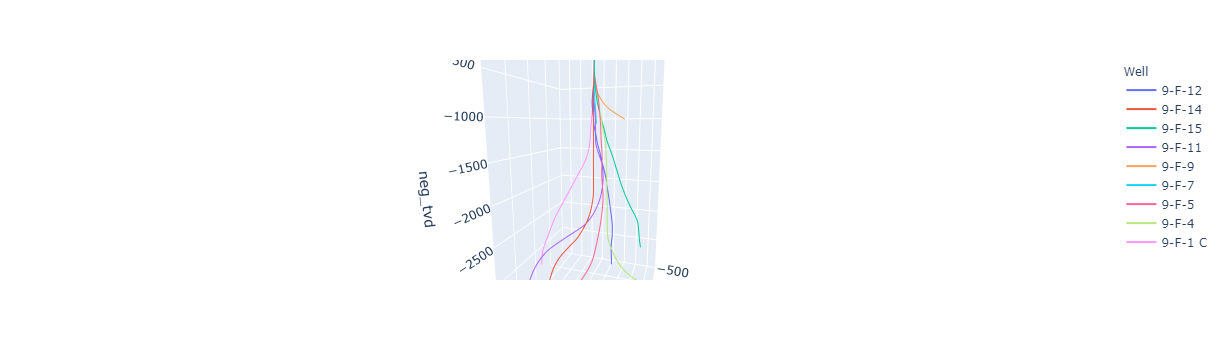

In [46]:
fig = px.line_3d(df_all_wells, 'dispNs', 'dispEw', 'neg_tvd', 'Well')
fig.show()